In [2]:
import pandas as pd

# Load the dataset
file_path = "/content/xAPI-Edu-Data.csv"
df = pd.read_csv(file_path)

# Display basic info
print("Dataset Overview:")
print(df.head())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Overview:
  gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
3      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
4      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
0        F   Father           15                16                  2   
1        F   Father           20                20                  3   
2        F   Father           10                 7                  0   
3        F   Father           30                25                  5   
4        F   Father           40                50                 12   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
0          20                   Yes     

In [3]:
from sklearn.preprocessing import LabelEncoder

# Drop duplicate rows if any
df = df.drop_duplicates()

# Encode categorical columns using Label Encoding
label_encoders = {}
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for future use

print("\nData after encoding:")
print(df.head())



Data after encoding:
   gender  NationalITy  PlaceofBirth  StageID  GradeID  SectionID  Topic  \
0       1            4             4        2        1          0      7   
1       1            4             4        2        1          0      7   
2       1            4             4        2        1          0      7   
3       1            4             4        2        1          0      7   
4       1            4             4        2        1          0      7   

   Semester  Relation  raisedhands  VisITedResources  AnnouncementsView  \
0         0         0           15                16                  2   
1         0         0           20                20                  3   
2         0         0           10                 7                  0   
3         0         0           30                25                  5   
4         0         0           40                50                 12   

   Discussion  ParentAnsweringSurvey  ParentschoolSatisfaction  \
0   

<ipython-input-3-93e24dda03d4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-3-93e24dda03d4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-3-93e24dda03d4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

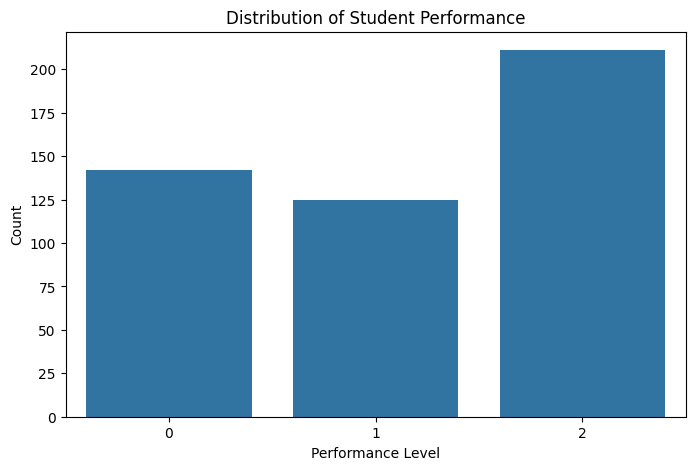

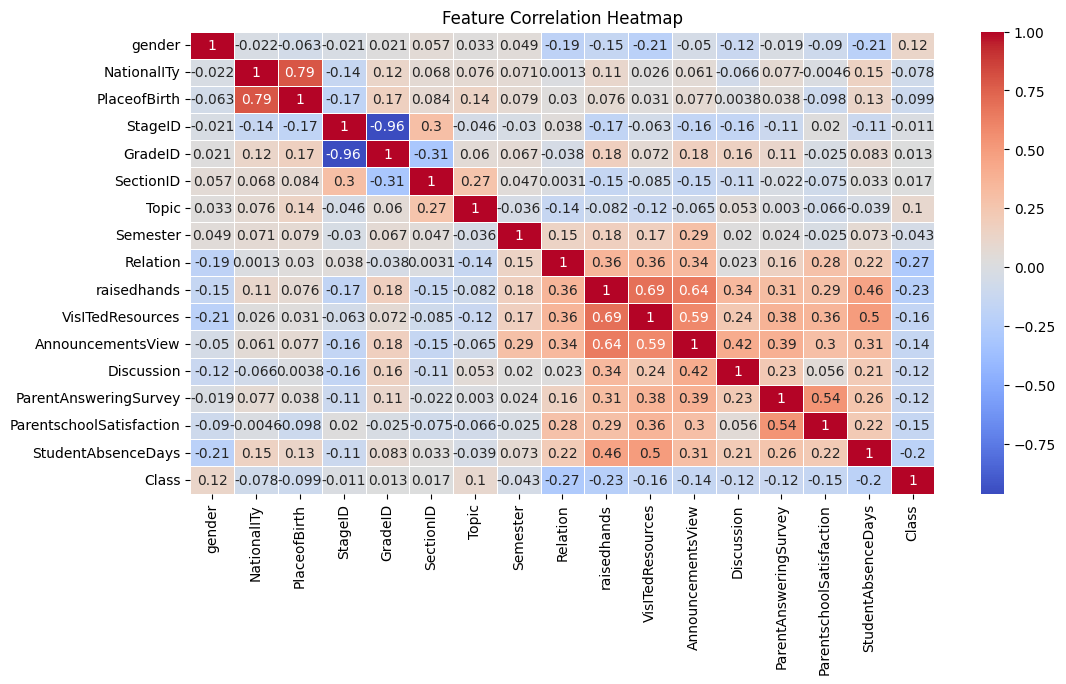

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of student performance
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Class'])
plt.title("Distribution of Student Performance")
plt.xlabel("Performance Level")
plt.ylabel("Count")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features (X) and target variable (y)
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target variable

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Model Accuracy: 0.8229166666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.83      0.78        24
           1       0.89      0.89      0.89        27
           2       0.83      0.78      0.80        45

    accuracy                           0.82        96
   macro avg       0.82      0.83      0.83        96
weighted avg       0.83      0.82      0.82        96



In [13]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("\nBest Parameters:", grid_search.best_params_)

# Train final model with best parameters
best_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate
y_pred_best = best_model.predict(X_test)
print("\nImproved Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))



Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}

Improved Model Accuracy: 0.8125

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.79      0.76        24
           1       0.89      0.89      0.89        27
           2       0.81      0.78      0.80        45

    accuracy                           0.81        96
   macro avg       0.81      0.82      0.81        96
weighted avg       0.81      0.81      0.81        96



In [74]:
# prompt: !pip install streamlit pandas numpy scikit-learn
# !npm install -g localtunnel  # Needed for accessing Streamlit in Colab

%%writefile app.py
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import streamlit as st
import numpy as np
import pickle

# Load the dataset
file_path = "/content/xAPI-Edu-Data.csv"
df = pd.read_csv(file_path)

# Display basic info
print("Dataset Overview:")
print(df.head())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


# Drop duplicate rows if any
df = df.drop_duplicates()

# Encode categorical columns using Label Encoding
label_encoders = {}
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for future use

print("\nData after encoding:")
print(df.head())


# Plot distribution of student performance
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Class'])
plt.title("Distribution of Student Performance")
plt.xlabel("Performance Level")
plt.ylabel("Count")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


# Define features (X) and target variable (y)
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target variable

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Define hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("\nBest Parameters:", grid_search.best_params_)

# Train final model with best parameters
best_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate
y_pred_best = best_model.predict(X_test)
print("\nImproved Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


# Save the trained model
with open("student_model.pkl", "wb") as f:
    pickle.dump(best_model, f)


# Load trained model safely
try:
    with open("student_model.pkl", "rb") as f:
        model = pickle.load(f)
except FileNotFoundError:
    st.error("Model file not found! Please train and save the model as 'student_model.pkl'.")
    st.stop()

st.title("🎓 Student Performance Prediction App")

# Sidebar for user input
st.sidebar.header("Enter Student Details")

# Example input fields
gender = st.sidebar.selectbox("Gender", ["Male", "Female"])
nationality = st.sidebar.selectbox("Nationality", ["USA", "UK", "Canada", "Other"])
grade_level = st.sidebar.slider("Grade Level", 1, 12, 6)
attendance = st.sidebar.slider("Attendance Rate (%)", 0, 100, 90)

# Convert categorical inputs
gender_encoded = 1 if gender == "Male" else 0
nationality_encoded = {"USA": 0, "UK": 1, "Canada": 2, "Other": 3}[nationality]

# Get feature names from trained model
expected_features = ["gender", "nationality", "grade_level", "attendance"]

# Create DataFrame for model input
student_data = pd.DataFrame([[gender_encoded, nationality_encoded, grade_level, attendance]],
                            columns=expected_features)

# Predict button
if st.sidebar.button("Predict Performance"):
    prediction = model.predict(student_data)
    st.success(f"🎯 **Predicted Student Performance Level:** {prediction[0]}")


Overwriting app.py
